## Manual $\hat{\text{QFT}}$ circuit

In [12]:
from qiskit import QuantumCircuit, QuantumCircuit, ClassicalRegister
import numpy as np

In [13]:
from qiskit.circuit.library import QFTGate
from qiskit.quantum_info import Statevector

In [14]:
def apply_QFThat(qc: QuantumCircuit):
    num_qubits = qc.num_qubits
    for i in reversed(range(num_qubits)):
        qc.h(i)
        for j in reversed(range(0, i)):
            phase = 2 * np.pi / 2 ** (i - j + 1)
            qc.cp(phase, j, i)
        # qc.barrier()
    for i in range(num_qubits // 2):
        qc.swap(i, num_qubits - i - 1)

In [15]:
def prep_GHZ_state(num_qubits):
    qc = QuantumCircuit(num_qubits)
    qc.h(0)
    for i in range(num_qubits - 1):
        qc.cx(i, i+1)
    return qc

Check for Quantum Fourier Transform

In [16]:
N = 10
random_coeffs = np.random.random(2 ** N)
random_coeffs = random_coeffs / np.sqrt(np.sum(np.abs(random_coeffs)**2))
qc = QuantumCircuit(N)
qc.initialize(random_coeffs)
qc2 = qc.copy()
apply_QFThat(qc)
qc2.append(QFTGate(N), range(N))
state = Statevector.from_instruction(qc)
state2 = Statevector.from_instruction(qc2)

Compare with Numpy DFT

In [266]:
np_dft = np.fft.ifft(random_coeffs, norm = 'ortho')

# Phase estimation algorithm

In [685]:
from qiskit.circuit.library import phase_estimation, RZGate

In [502]:
from qiskit.circuit import QuantumRegister, ClassicalRegister

In [541]:
num_qubits = 1

In [554]:
from qiskit.quantum_info import Operator

In [681]:
ereg[:] + qreg[:]

[<Qubit register=(10, "e"), index=0>,
 <Qubit register=(10, "e"), index=1>,
 <Qubit register=(10, "e"), index=2>,
 <Qubit register=(10, "e"), index=3>,
 <Qubit register=(10, "e"), index=4>,
 <Qubit register=(10, "e"), index=5>,
 <Qubit register=(10, "e"), index=6>,
 <Qubit register=(10, "e"), index=7>,
 <Qubit register=(10, "e"), index=8>,
 <Qubit register=(10, "e"), index=9>,
 <Qubit register=(1, "q"), index=0>]

In [650]:
qpe_qubits = 10

In [660]:
qreg = QuantumRegister(num_qubits, 'q')
creg = ClassicalRegister(qpe_qubits, 'c')
ereg = QuantumRegister(qpe_qubits, 'e')
qc = QuantumCircuit(ereg, qreg)
qpe_circuit = phase_estimation(qpe_qubits, RZGate(-3))
qc.append(qpe_circuit, ereg[:] + qreg[:])
qc.add_register(creg)
qc.measure(ereg, creg)

In [661]:
from qiskit.primitives import StatevectorSampler

In [662]:
sampler = StatevectorSampler()

# Hadamard test

Given a unitary $U$ and a state $\ket{\psi}$ the Hadamard test estimates $\langle \psi | U |\psi \rangle \in \mathbb{C}$. Let's try to implement this with
\begin{equation}
U = R_z(\theta) = e^{-i\theta Z/2} = \begin{pmatrix} e^{-i\theta/2} & 0 \\ 0 & e^{i\theta/2} \end{pmatrix}
\end{equation}
Hence for the computational basis states $\ket{0}, \ket{1}$, we have
\begin{equation}
\begin{split}
\langle 0 | U | 0 \rangle &= e^{-i\theta/2}\\
\langle 1 | U | 1 \rangle &= e^{i\theta/2}
\end{split}
\end{equation}

In [688]:
qc_h = QuantumCircuit(2)

In [689]:
from qiskit.circuit.library import RZGate

In [690]:
from qiskit.circuit import Parameter

In [868]:
qc_h = QuantumCircuit(2)
qc_h.h(0)
c_rz_gate = RZGate(Parameter('theta')).control(1)
qc_h.append(c_rz_gate, [0,1])
qc_h.h(0)
creg = ClassicalRegister(1, 'c')
qc_h.add_register(creg)
qc_h.measure(0, creg)

In [869]:
theta_vals = np.arange(0, 2 * np.pi, 0.1)

In [870]:
sampler = StatevectorSampler()

In [871]:
job = sampler.run([(qc_h, theta_vals)], shots = 1000)

In [872]:
result = job.result()[0]

In [873]:
size = len(theta_vals)

In [874]:
lst = []

In [875]:
for i in range(size):
    val = result.data.c.get_counts(i)
    lst.append(val.get('0', 0) / 1000)

In [876]:
import matplotlib.pyplot as plt

In [877]:
true_val = 0.5 * (1 + np.cos(theta_vals / 2))

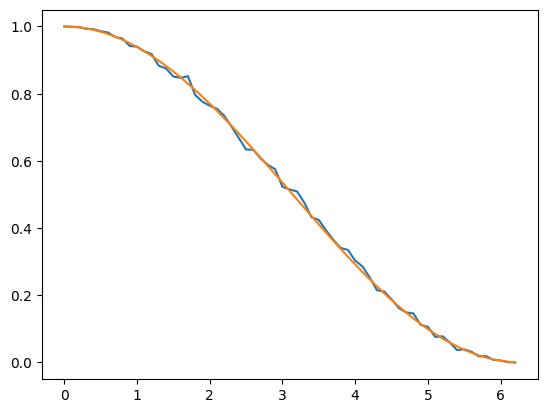

In [878]:
plt.plot(theta_vals, lst)
plt.plot(theta_vals, true_val)

In [879]:
qc_imag = QuantumCircuit(2)

In [835]:
qc_imag.h(0)
qc_imag.sdg(0)

In [836]:
qc_imag.append(c_rz_gate, [0,1])

In [837]:
qc_imag.h(0)

In [838]:
qc_imag.assign_parameters({'theta': 0.2})

In [839]:
creg = ClassicalRegister(1, 'c')

In [840]:
qc_imag.add_register(creg)
qc_imag.measure(0, creg)

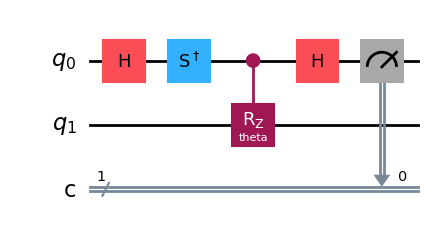

In [841]:
qc_imag.draw('mpl')

In [858]:
job = sampler.run([(qc_imag, theta_vals)], shots = 1000)

In [859]:
lst = []

In [860]:
for i in range(len(theta_vals)):
    val = job.result()[0].data.c.get_counts(i).get('0', 0)
    lst.append(val/1000)

In [861]:
exact_vals = 0.5 * (1 - np.sin(theta_vals / 2))

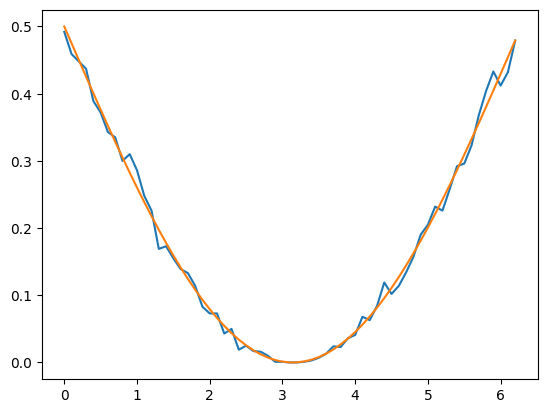

In [862]:
plt.plot(theta_vals, lst)
plt.plot(theta_vals, exact_vals)